In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')


# Data Cleaning

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# first we convert the column name 
df.rename(columns={'Category':'target'},inplace=True)

In [6]:
df.sample(5)

,target,Message
2675,ham,I am 6 ft. We will be a good combination!
1342,ham,Just chill for another 6hrs. If you could slee...
402,ham,Dear how is chechi. Did you talk to her
3000,ham,"Oh, then your phone phoned me but it disconnected"
5111,ham,I've reached sch already...


In [7]:
# now we will change target dtpye using label encoder
from sklearn.preprocessing import LabelEncoder

In [8]:
encder = LabelEncoder()

In [9]:
df['target'] = encder.fit_transform(df['target'])

In [10]:
df.shape

(5572, 2)

In [11]:
# checking null values
df.isnull().sum()

target     0
Message    0
dtype: int64

In [12]:
# checking duplicate values
df.duplicated().sum()

415

In [13]:
# droping duplicate
df.drop_duplicates(keep='first',inplace=True)

In [14]:
# again checking duplicates
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

# EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

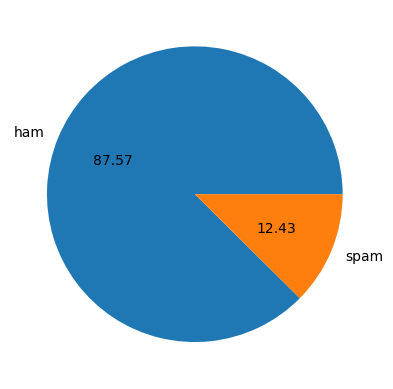

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
# as our data is almost 90% not spam so our data is imbalanced


In [20]:
# for in depth analysis we will use nltk(natural language tool kit)
# also we will make 3 columns from message for better analysis
# (1)numer of character,(2)# number of words, (3)# number of sentence

!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ayyan
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:

# numer of character
df['num_character'] = df['Message'].apply(len)

In [20]:
df.head()

,target,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# number of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,Message,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# number of sentence
df['num_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,Message,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:

df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

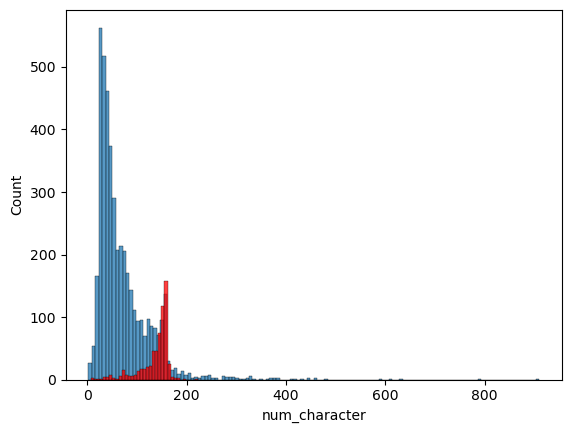

In [26]:
# for number of character
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

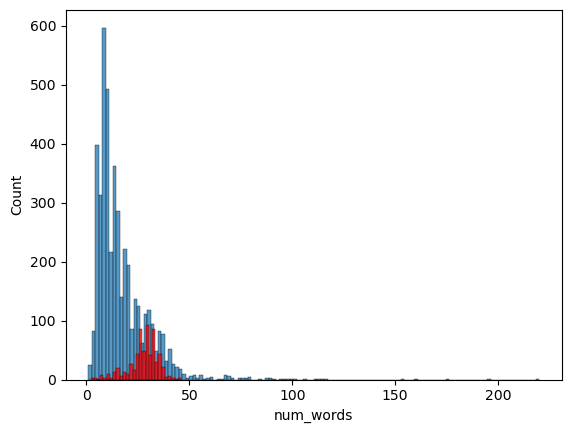

In [27]:
# for number of number of words
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

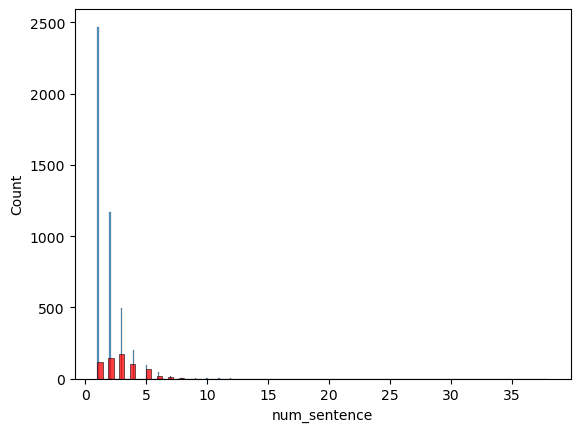

In [28]:
# for number of number of sentences
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


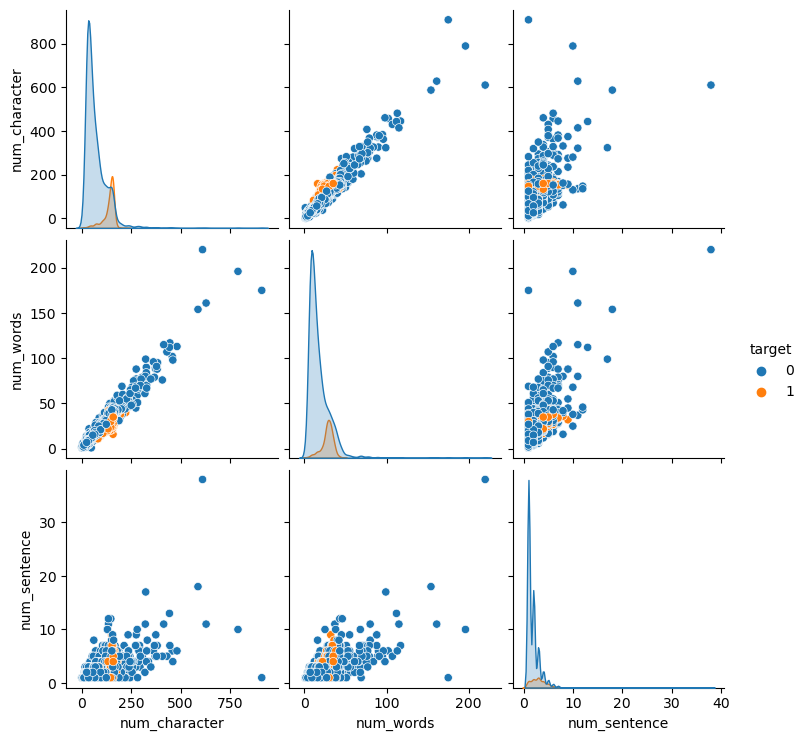

In [29]:
# now we will check their relation with each other
sns.pairplot(df,hue='target')

In [30]:
df.corr(numeric_only=True)


,target,num_character,num_words,num_sentence
target,1.000000,0.374409,0.255968,0.259023
num_character,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sentence,0.259023,0.622428,0.679396,1.000000


<Axes: >

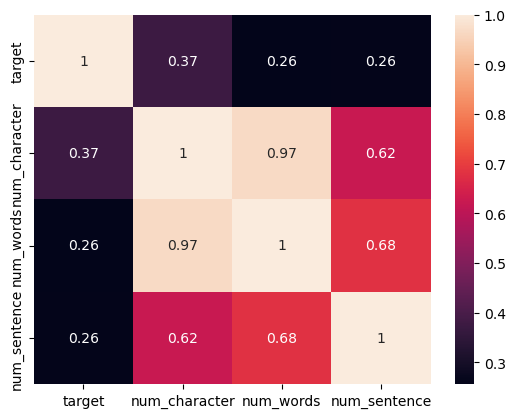

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing
### 1)  Lower case
### 2) Tokenization
### 3) Removing special characters
### 4) Removing stop words and punctuation
### 5)Stemming

In [32]:
# we will make function that will do the above preprocessing

def transform_text(text):
    text = text.lower()
    return text

In [33]:
transform_text("Hi How Are U")

'hi how are u'

In [34]:
transform_text('Hi How Are U')

'hi how are u'

In [35]:
from nltk.corpus import stopwords

In [36]:
import string

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # removing puctuation and strings
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # for steaming
    # steaming mai hm same words ka aik single meaning likhte hain jaise dance,dances,dancing, to is main hm just dance likhe ge
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [40]:
transform_text('I Am Going To School ')

'go school'

In [41]:
import nltk

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ayyan
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# now as we complete preprocessing now we will apply this to our message and make new column

df['transformed_text'] = df['Message'].apply(transform_text)

In [43]:
df.head()

,target,Message,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 326.8 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/299.9 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [44]:
# now we will check the top messages using world cloud
from wordcloud import WordCloud

In [45]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

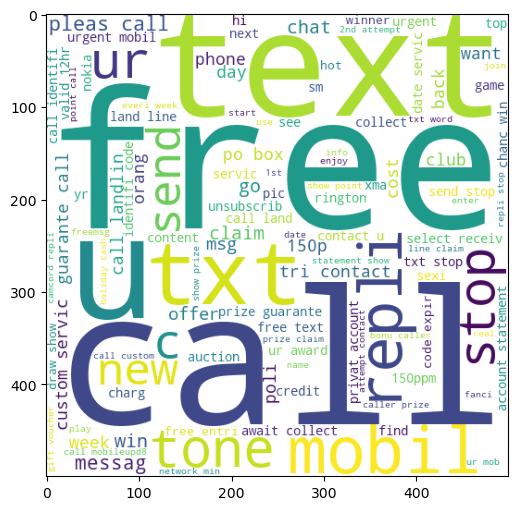

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

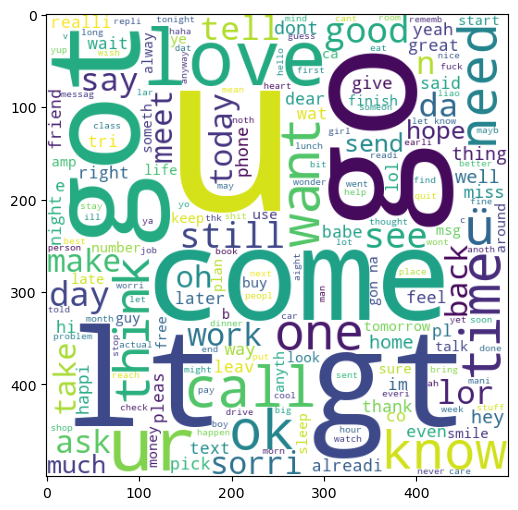

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
# to check to 30-50 spam words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [51]:
len(spam_corpus)

9781

In [52]:
from collections import Counter

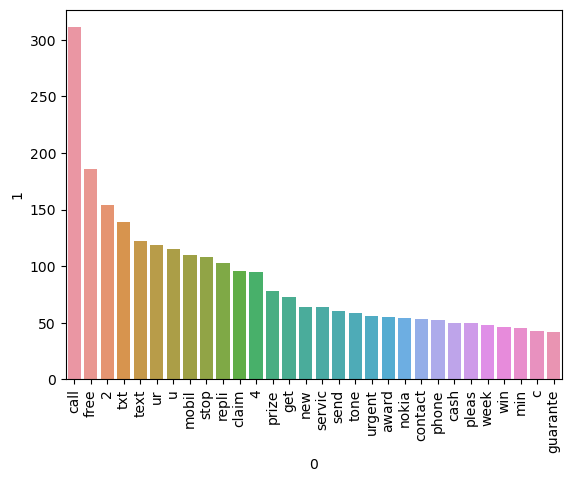

In [53]:
# these are the top 30 spam words 

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
# now top 30 ham msgs are
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35940

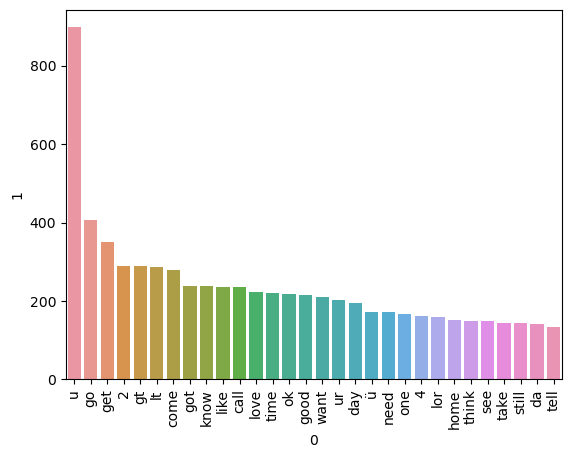

In [56]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# using counter vetororizer it perform well but not good as compare to TfidfVectorizer
# as the accuracy is little low so will use the hidden parameter max_feature in tffid to increase the accuracy

In [58]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
X.shape

(5157, 3000)

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [67]:
gnb.fit(X_train,y_train)

GaussianNB()

In [68]:
y_pred1 = gnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred1))
print('confusion_matrix', confusion_matrix(y_test,y_pred1))
print('precision_score',precision_score(y_test,y_pred1))

accuracy_score 0.8672480620155039
confusion_matrix [[785 120]
 [ 17 110]]
precision_score 0.4782608695652174


In [69]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred2))
print('confusion_matrix', confusion_matrix(y_test,y_pred2))
print('precision_score',precision_score(y_test,y_pred2))

accuracy_score 0.9835271317829457
confusion_matrix [[903   2]
 [ 15 112]]
precision_score 0.9824561403508771


In [70]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred3))
print('confusion_matrix', confusion_matrix(y_test,y_pred3))
print('precision_score',precision_score(y_test,y_pred3))

accuracy_score 0.9709302325581395
confusion_matrix [[905   0]
 [ 30  97]]
precision_score 1.0


In [126]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))